import  Library

In [1]:
# Model 
from sklearn.svm import SVC
# Preprocessing Data 
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn import metrics
import random
# Visualizer 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA
# save
import pickle as pkl

membuat variabel dan memasukkan data ke variabel lalu memanggilnya

In [2]:
dffish = pd.read_csv('fish_data.csv')
dffish

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


untuk mengetahui info dari tabel (berapa kolom,berapa banyak data tiap kolom ,type data)

In [3]:
dffish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


untuk mengetahui min,max,mean

In [4]:
dffish.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


mengetahui jumlah label dan  apa aja labelnya + type data

In [5]:
pd.unique(dffish['species'])

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

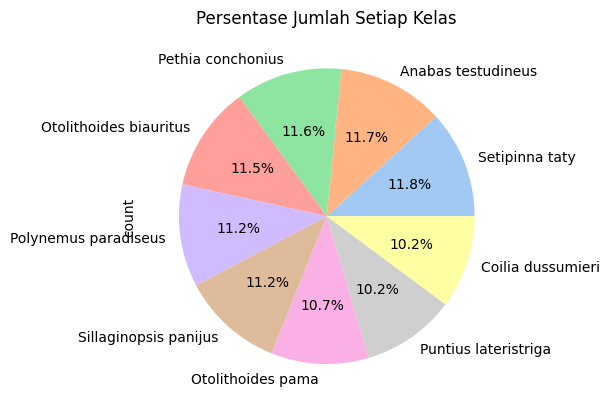

In [6]:
sns.set_palette('pastel')
dffish['species'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Persentase Jumlah Setiap Kelas")
plt.show()

mengetahui jumlah data yang dari setiap label

In [7]:
dffish['species'].value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

split dependent (target/label) independent (atribut) variable (memisahkan antara kolom dependent dan independent)

In [8]:
x = dffish.iloc[:,1:].values
y = dffish.iloc[:,[0]].values

feature Encoder

In [9]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

c:\Users\ypray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 8, 8, 8])

feature scaling

In [10]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x


array([[0.15636364, 0.33018868, 0.42857143],
       [0.02      , 0.28773585, 0.69642857],
       [0.07345455, 0.33254717, 0.58928571],
       ...,
       [0.96181818, 0.99056604, 0.19642857],
       [0.85163636, 0.95754717, 0.23214286],
       [0.91854545, 0.96462264, 0.19642857]])

membagi data untuk test dan traning

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# Menampilkan dimensi data
print("Dimensi x_train:", x_train.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi x_test:", x_test.shape)
print("Dimensi y_test:", y_test.shape)

Dimensi x_train: (3264, 3)
Dimensi y_train: (3264,)
Dimensi x_test: (816, 3)
Dimensi y_test: (816,)


traning / fit model


In [12]:
def fitnes(y_true, x, p): 
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    models = SVC(kernel=kernels[int(p[0])], gamma=p[1], C=p[2]).fit(x, y_true)
    y_pred = models.predict(x)
    loss = metrics.mean_squared_error(y_true, y_pred)
    acc = metrics.accuracy_score(y_true, y_pred)
    return loss, acc

# Spawn populasi
def spwan_pop(): 
    return np.array([np.random.randint(0, 4), np.abs(np.random.randn()), np.abs(np.random.random())])

# Iterasi dan parameter tuning
ite = 100
params = []
loss = []
accs = []
gammas = []
cs = []

for i in tqdm(range(ite) , 'Fine Tuning...') : 
    pop = spwan_pop()
    fitnesh , acc = fitnes(y_train , x_train, pop)
    params.append(pop)
    loss.append(fitnesh)
    accs.append(acc)
    gammas.append(pop[1])
    cs.append(pop[2])       
# Ambil parameter terbaik
best = params[np.argmin(loss)]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# Latih model terbaik
modelsh = SVC(kernel=kernels[int(best[0])], gamma=best[1], C=best[2]).fit(x_train, y_train)
# save model
try:# Simpan model ke dalam file pickle
    with open('svm_fish.pkl', 'wb') as f:
        pkl.dump(modelsh, f)
    print("Model berhasil disimpan.")
except Exception as e:
    print(f"Terjadi kesalahan saat menyimpan: {e}")

Fine Tuning...: 100%|██████████| 100/100 [00:30<00:00,  3.32it/s]

Model berhasil disimpan.


In [13]:
with open('scaler_fish_SVM.pkl', 'wb') as scaler_file:
    pkl.dump(scaler, scaler_file)
with open('label_encoder_fish_SVM.pkl', 'wb') as encoder_file:
    pkl.dump(encoder, encoder_file)

Accuration Check, Classification Report, and Visual Confusion Matrix

Kernel terbaik : rbf | gamma = 1.684099701352387 | C = 0.956322841830843
Loss = 1.7248774509803921 | Skor akurasi = 0.930453431372549 atau 93.05%


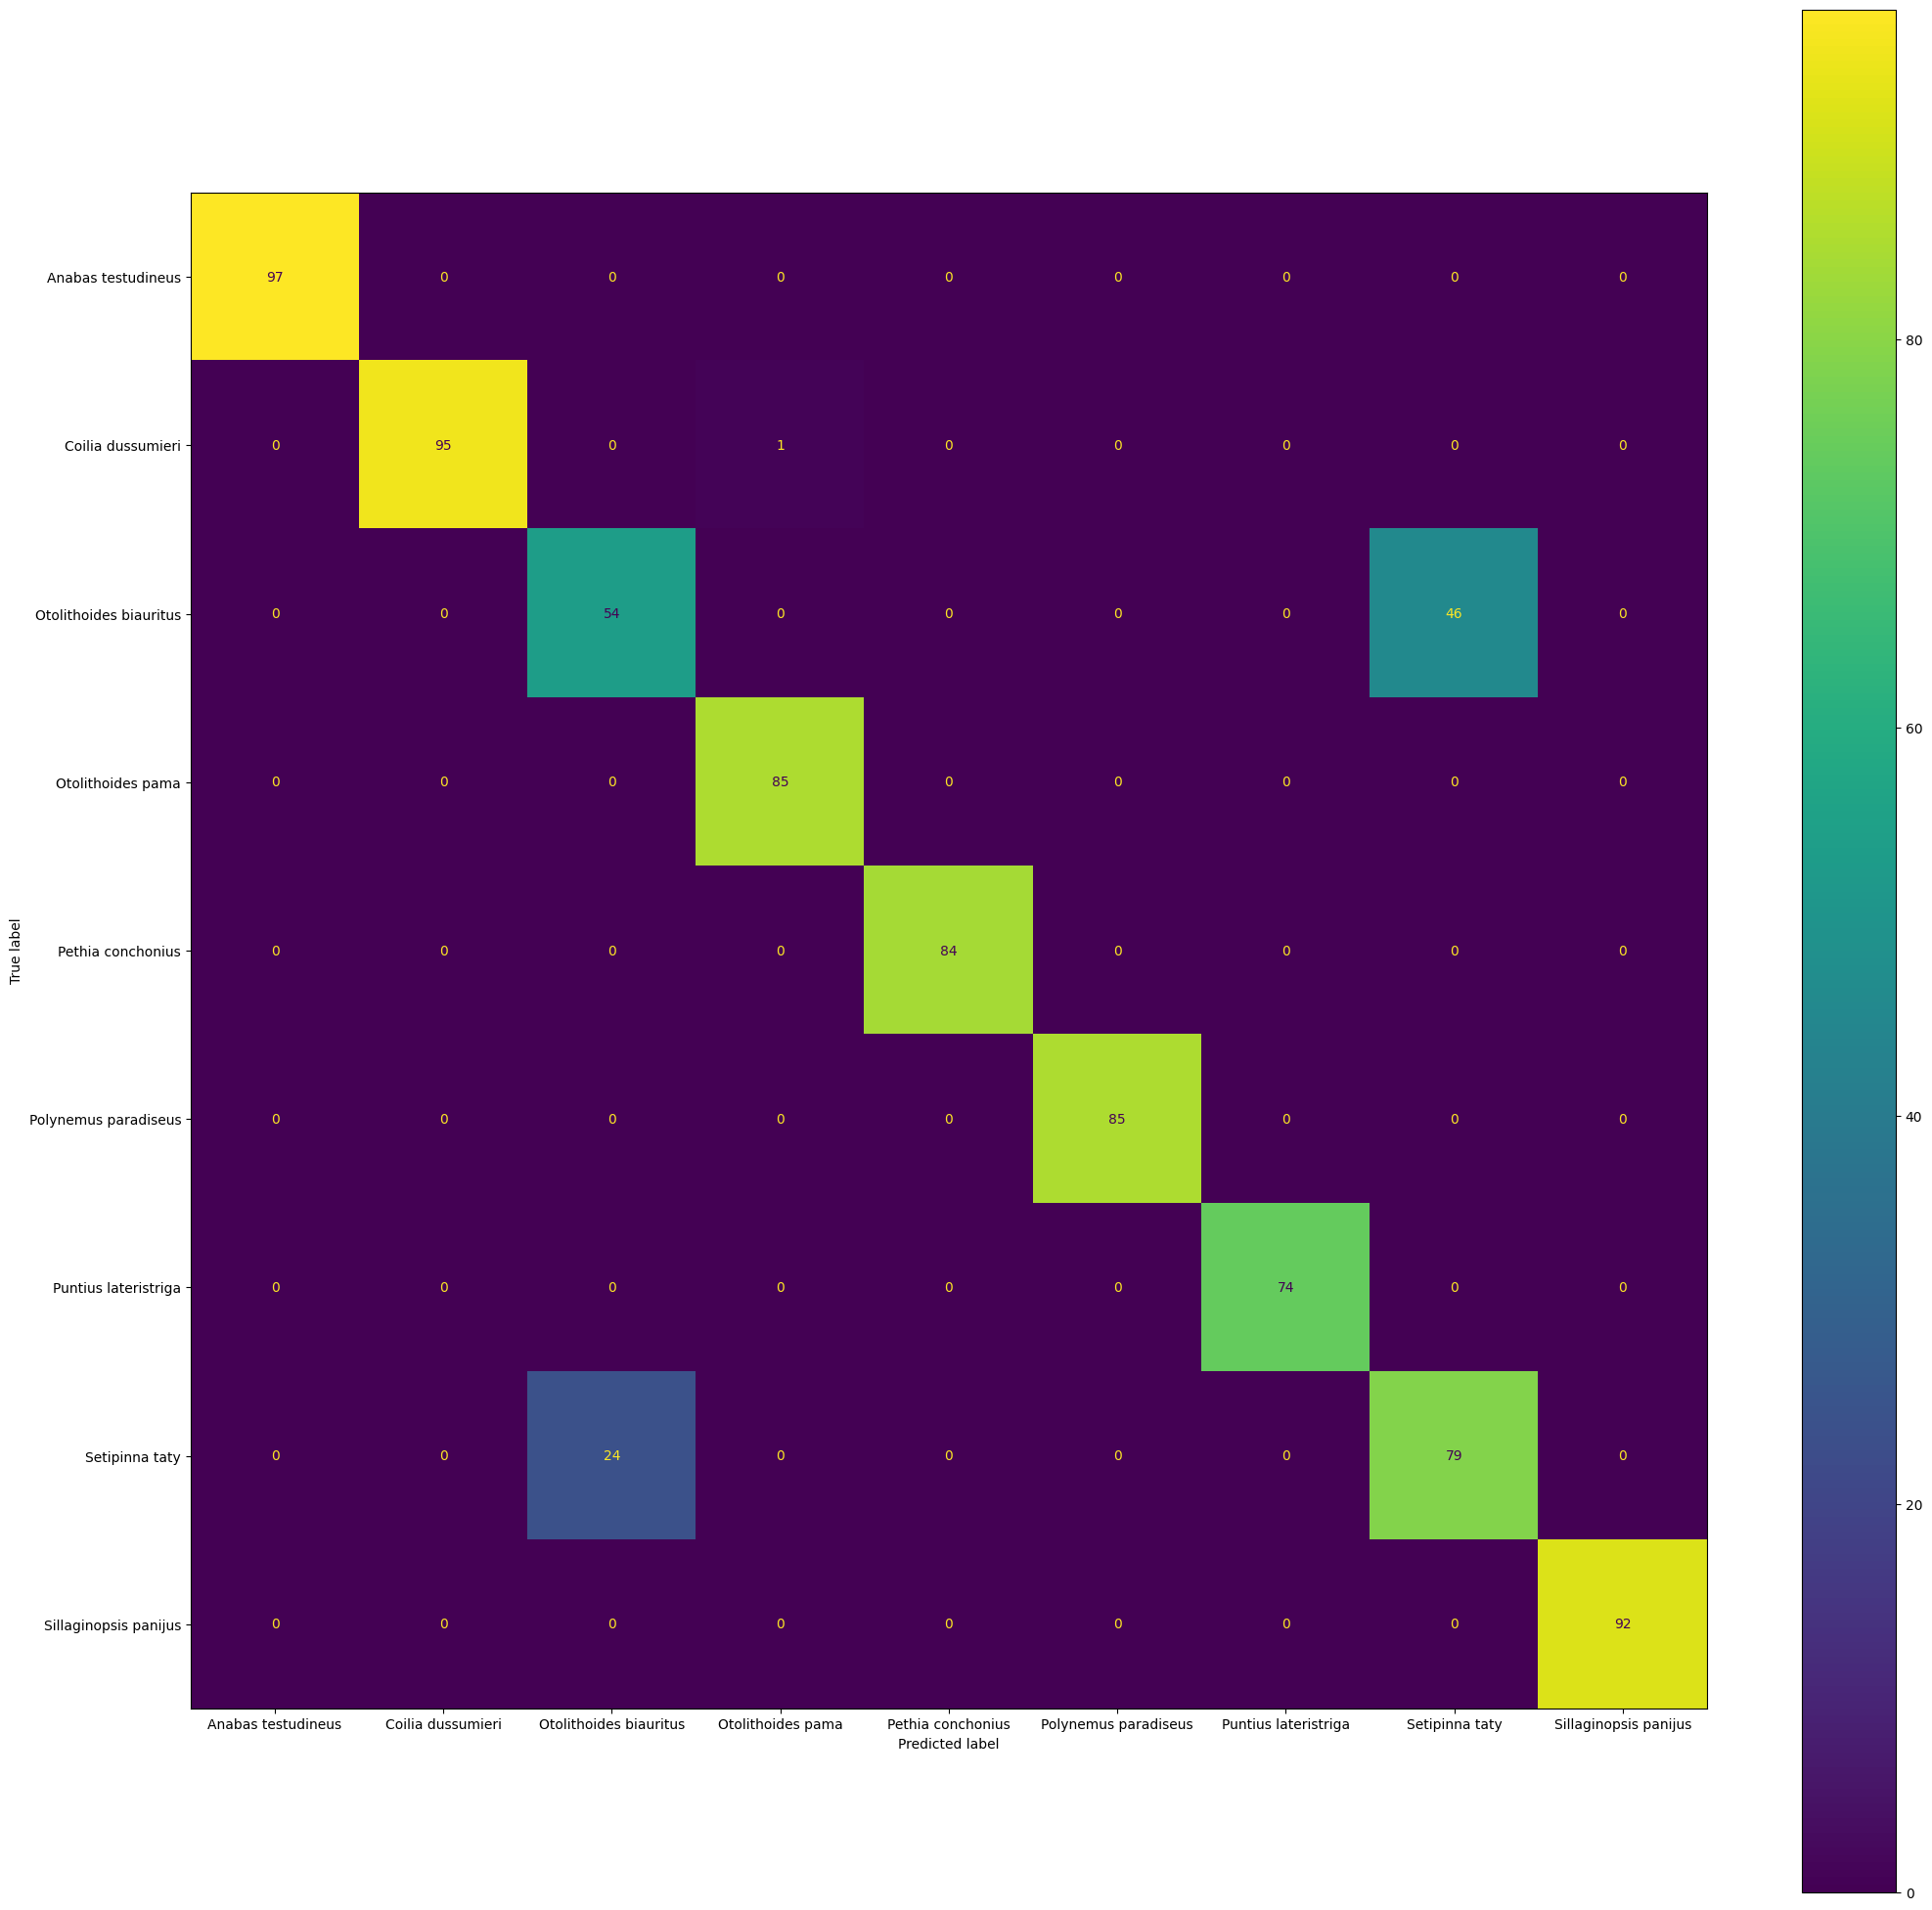

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prediksi data uji
y_prediction = modelsh.predict(x_test)
# Hitung akurasi pada data uji
acc = metrics.accuracy_score(y_test, y_prediction)
print(f'Kernel terbaik : {kernels[int(best[0])]} | gamma = {best[1]} | C = {best[2]}')
print(f'Loss = {np.min(loss)} | Skor akurasi = {np.max(accs)} atau {np.max(accs)*100:.2f}%')
# Visualisasi matriks kebingungan
labels = ['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus']
fig, ax = plt.subplots(figsize=(25, 25))  
ConfusionMatrixDisplay(confusion_matrix(y_test, y_prediction), display_labels=labels).plot(ax=ax)



In [15]:
y_prediction

array([6, 4, 3, 4, 5, 8, 6, 5, 8, 7, 5, 3, 2, 4, 7, 3, 2, 1, 8, 3, 7, 1,
       7, 6, 0, 1, 6, 1, 7, 5, 3, 3, 4, 5, 6, 7, 7, 8, 4, 4, 8, 7, 0, 7,
       1, 7, 7, 7, 5, 6, 1, 5, 2, 4, 0, 6, 7, 1, 1, 2, 3, 8, 3, 1, 1, 3,
       1, 3, 3, 1, 2, 4, 7, 8, 6, 5, 7, 5, 4, 0, 7, 6, 6, 7, 2, 1, 7, 6,
       7, 8, 6, 4, 4, 6, 0, 7, 0, 4, 2, 1, 8, 4, 4, 0, 8, 3, 8, 7, 5, 2,
       1, 0, 7, 8, 2, 7, 0, 8, 5, 8, 7, 2, 1, 2, 0, 1, 4, 0, 3, 4, 0, 4,
       7, 3, 1, 8, 8, 4, 7, 7, 8, 0, 0, 8, 5, 5, 7, 7, 7, 6, 3, 7, 0, 1,
       3, 4, 0, 5, 1, 8, 3, 3, 7, 8, 3, 1, 7, 7, 1, 7, 0, 2, 2, 2, 4, 5,
       8, 3, 0, 5, 2, 4, 6, 6, 1, 4, 1, 4, 8, 8, 5, 1, 5, 0, 4, 0, 3, 3,
       5, 3, 4, 0, 6, 4, 0, 4, 8, 2, 6, 8, 8, 3, 4, 8, 1, 5, 6, 8, 4, 0,
       8, 3, 6, 2, 2, 0, 3, 4, 7, 6, 0, 7, 5, 8, 4, 8, 2, 5, 5, 5, 1, 8,
       3, 8, 3, 6, 4, 6, 1, 0, 1, 1, 0, 4, 7, 2, 8, 5, 2, 8, 5, 5, 7, 7,
       4, 4, 7, 1, 1, 7, 1, 1, 1, 4, 8, 2, 6, 8, 8, 2, 0, 0, 1, 8, 5, 4,
       1, 1, 3, 4, 7, 4, 8, 3, 8, 3, 2, 2, 1, 8, 5,

[[-0.27729642  0.00285421]
 [-0.53804895  0.10689269]
 [-0.42589924  0.08889539]
 ...
 [ 0.69064021  0.44920558]
 [ 0.57412934  0.43890331]
 [ 0.64809638  0.42673366]]


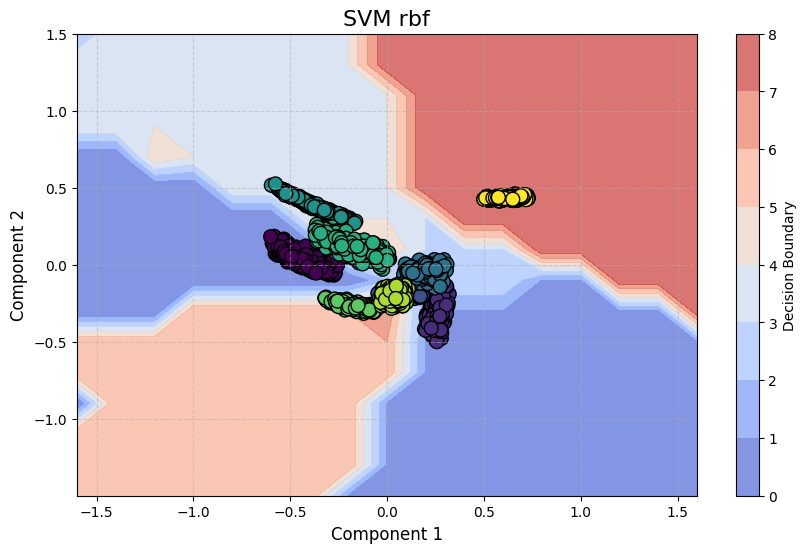

In [16]:
PCAcomponent = PCA(2).fit(x, y)
componen = PCAcomponent.transform(x)
print(componen)
xmin , xmax = componen[:,0].min() - 1, componen[:,0].max() + 1
ymin , ymax = componen[:,1].min() - 1, componen[:,1].max() + 1
xx,yy = np.meshgrid(
    np.arange(xmin , xmax , 0.2) , np.arange(ymin , ymax , 0.2) 
)
loadM = SVC(kernel=kernels[int(best[0])] , gamma=best[1] , C=best[2]).fit(componen, y)
z = loadM.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
# plt.title(f"SVM {kernels[int(best[0])]}")
# plt.contourf(xx, yy ,z , alpha = 0.7)
# plt.scatter(x=componen[:,0] , y=componen[:,1] , c=y)
# plt.show()
plt.figure(figsize=(10, 6))  # Memperbesar ukuran gambar
plt.title(f"SVM {kernels[int(best[0])]}", fontsize=16)
contour = plt.contourf(xx, yy, z, alpha=0.7, cmap='coolwarm')  # Warna lebih kontras
plt.colorbar(contour, label="Decision Boundary")  # Menambahkan color bar
scatter = plt.scatter(x=componen[:, 0], y=componen[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel("Component 1", fontsize=12)
plt.ylabel("Component 2", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # Menambahkan grid untuk referensi
plt.show()


In [17]:
def test_new_data(new_data):
    # Skala data baru
    new_data_scaled = scaler.transform(new_data)
    # Prediksi menggunakan model
    predictions = modelsh.predict(new_data_scaled)
    # Dekode prediksi menjadi label asli
    predictions_decoded = encoder.inverse_transform(predictions)
    return predictions_decoded

# Contoh data baru untuk diuji
new_data = pd.DataFrame({
    'length': [5.5, 6.3],
    'weight': [120, 150],
    'w_l_ratio': [200, 180]   		
})

print("Prediksi untuk data baru:")
try:
    predictions = test_new_data(new_data)
    print(predictions)
except ValueError as e:
    print(f"Error: {e}")

Prediksi untuk data baru:
['Otolithoides pama' 'Otolithoides pama']


c:\Users\ypray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
